In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
##loading the dataset
data = pd.read_csv('SampleData.csv')
print(data)

          Day     Mood  Task Weather HaveTransport Traffic Jam  \
0   Wednesday      Sad    10   Sunny            No          No   
1      Friday  Excited    26   Sunny           Yes          No   
2      Monday  Anxious    15    Cold           Yes          No   
3   Wednesday      Sad    20   Rainy            No          No   
4     Tuesday      Sad    23   Rainy           Yes         Yes   
5     Tuesday  Excited    13    Cold            No         Yes   
6      Monday    Bored     4   Sunny            No         Yes   
7     Tuesday  Excited     6   Windy            No          No   
8      Monday  Anxious    15    Cold            No         Yes   
9     Tuesday  Excited     7   Rainy           Yes          No   
10     Monday  Anxious   100   Sunny            No         Yes   
11  Wednesday  Excited    13   Sunny           Yes         Yes   
12     Friday    Bored    21    Cold            No         Yes   
13  Wednesday  Excited    25   Sunny            No         Yes   
14    Tues

In [3]:
##checking for data types
print(data.dtypes)
print(data.shape)

Day                object
Mood               object
Task               object
Weather            object
HaveTransport      object
Traffic Jam        object
SleepingPartner    object
CometoWork         object
dtype: object
(35, 8)


In [4]:
##changing data type and dropping
data.loc[data['Task']=='Null','Task']=np.nan
print(data.shape)
data.dropna(axis=0,inplace=True)
print(data.shape)
data['Task'] = pd.to_numeric(data['Task'])
print(data.dtypes)

(35, 8)
(34, 8)
Day                object
Mood               object
Task                int64
Weather            object
HaveTransport      object
Traffic Jam        object
SleepingPartner    object
CometoWork         object
dtype: object


In [5]:
data.rename(columns={'HaveTransport':'Have_Transport','Traffic Jam':'Traffic_Jam','SleepingPartner':'Sleeping_Partner','CometoWork':'Come_to_Work'},inplace=True)
data.columns

Index(['Day', 'Mood', 'Task', 'Weather', 'Have_Transport', 'Traffic_Jam',
       'Sleeping_Partner', 'Come_to_Work'],
      dtype='object')

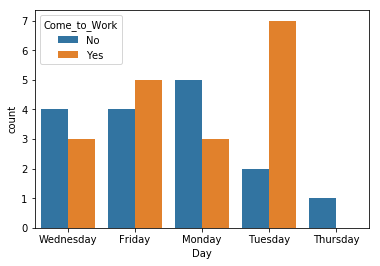

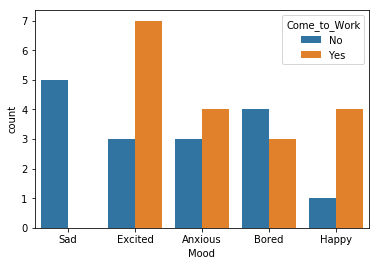

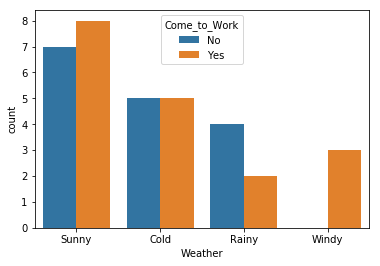

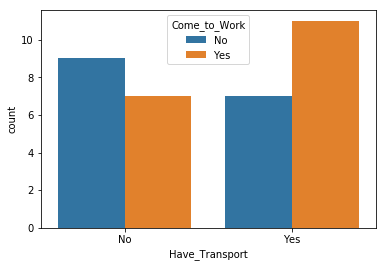

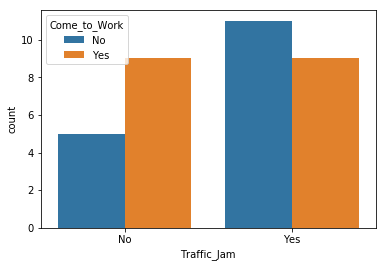

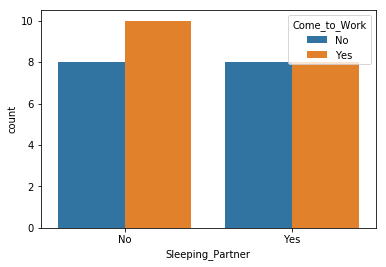

In [6]:
##plotting the attendance per day
def count_plots (data, cols):
    for col in cols:
        sns.countplot(x=col,hue='Come_to_Work',data=data)
        plt.show()
plot_cols = ['Day','Mood','Weather','Have_Transport','Traffic_Jam','Sleeping_Partner']
count_plots(data,plot_cols)

In [8]:
##encoding
def encode_data(data,cols):
    dummies = pd.get_dummies(data,columns=cols,drop_first=True)
    dummies =dummies.drop(['Task'],axis=1)
    merged_data = pd.concat([data,dummies],axis=1)
    final_data = merged_data.drop(cols,axis=1)
    return final_data
cols = ['Day','Mood', 'Weather', 'Have_Transport', 'Traffic_Jam','Sleeping_Partner', 'Come_to_Work']
final_data = encode_data(data,cols)
final_data

,Task,Day_Monday,Day_Thursday,Day_Tuesday,Day_Wednesday,Mood_Bored,Mood_Excited,Mood_Happy,Mood_Sad,Weather_Rainy,Weather_Sunny,Weather_Windy,Have_Transport_Yes,Traffic_Jam_Yes,Sleeping_Partner_Yes,Come_to_Work_Yes
0,10,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
1,26,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1
2,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,20,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
4,23,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0
5,13,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1
6,4,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0
7,6,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
8,15,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
9,7,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1


In [ ]:
##visualizing distribution
def plot_box(data,cols,col_x = 'Come_to_Work'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x,col,data = data)
        plt.xlabel(col_x)
        plt.ylabel(col)
        plt.sho()
cols=['Day','Mood','Task', 'Weather', 'Have_Transport', 'Traffic_Jam','Sleeping_Partner']
plot_box(data,cols)